## Find whether the room will be occupied or not by client-0 or 1(by KNN method). Sensors are present inside room to give following data


### Output dataframe should have only ID and occupancy columns

In [13]:
#KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dff = pd.read_csv("SpaData.csv")
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = dff.drop(columns = ['GTOccupancy', 'TimeStamp'], axis=1).copy()
y = dff['GTOccupancy']
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8) #training data
# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(5211, 6)
(5211,)
(651, 6)
(651,)
(652, 6)
(652,)


(None, None)

In [14]:
#elbow method
#find optimum no. of neighbors, in b/w 1 to 50
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

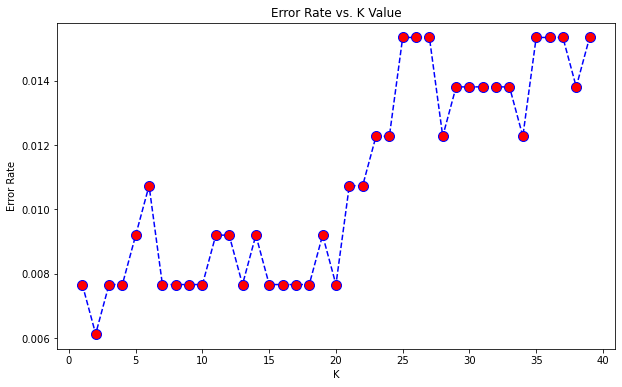

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color= "blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [16]:
classifier = KNeighborsClassifier(n_neighbors = 13)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [17]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[500   5]
 [  0 147]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       505
           1       0.97      1.00      0.98       147

    accuracy                           0.99       652
   macro avg       0.98      1.00      0.99       652
weighted avg       0.99      0.99      0.99       652

Accuracy: 0.9923312883435583


In [18]:
#export the file
y_pred.shape
a=[]
for i in range(652):
    a.append(i)

final = pd.DataFrame({'ID':a, 'occupancy':y_pred})

In [ ]:
final_rej = final.to_csv('Rejuvenate123.csv', index=False)

In [ ]:
df3 = pd.read_csv("Rejuvenate123.csv")